In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
import json

In [ ]:
count=0
while(count<1000):   #Loop for 1000 fit lined Bootstrap
    np.set_printoptions(formatter={'float_kind':'{:f}'.format})  #Displays numbers in decimal form (no E), to help format columns in text file to plot
    data=np.loadtxt('F2ratio.dat')   #Call .dat file
    newdata=[]       #Create random data set from .dat file
    for d in range(len(data)):
        a=np.random.randint(0,len(data))
        newdata.append(data[a])
    str = "null"     #Have to delete this variable to get str function to work
    del str
    string2 = ''.join(str(e) for e in newdata)   #Change to string
    with open('BootstrapFit.txt', 'w') as f:     #Create text file to store random data 
        f.write(string2)
    path = 'BootstrapFit.txt'   #This removes characters which do not meet ploting standards
    try:
        with open(path, 'r') as infile:
            info = infile.read().replace('][', '\n')
    except OSError as exception:
        print('ERROR: could not read file:')
        print('  %s' % exception)
    else:
        with open(path, 'w') as outfile:
            outfile.write(info)
    path = 'BootstrapFit.txt'   #This removes characters which do not meet ploting standards
    try:
        with open(path, 'r') as infile:
            info = infile.read().replace('[', '')
    except OSError as exception:
        print('ERROR: could not read file:')
        print('  %s' % exception)
    else:
        with open(path, 'w') as outfile:
            outfile.write(info)
    path = 'BootstrapFit.txt'   #This removes characters which do not meet ploting standards
    try:
        with open(path, 'r') as infile:
            info = infile.read().replace(']', '')
    except OSError as exception:
        print('ERROR: could not read file:')
        print('  %s' % exception)
    else:
        with open(path, 'w') as outfile:
            outfile.write(info)
    data=np.loadtxt('BootstrapFit.txt')   #Call .txt file
    def rational(x,n0,n1,m1):             #Marathon.ipynb file rational definition
        return n0*(1+x*n1)/(1+x*m1)
    model=Model(rational)                 #Marathon.ipynb file model call
    result=model.fit(data[:,3],x=data[:,0],n0=1,n1=0,m1=0,weights=1/data[:,4])   #Marathon.ipynb file result call
    valuesaver = json.dumps(result.best_values)   #Changes dict (definition) to string
    with open('BestValuesLoop.txt', 'a') as k:    #Appends new data to existing lines in .txt file
        k.write(valuesaver)
        k.write('\n')
    count +=1
else:
    print("count value reached %d" %(count))

Files needed/created by previous cell
- need: F2ratio.dat (MARATHON data file)
- create: BootstrapFit.txt (stores randomized data created)
- create: BestValuesLoop.txt (fit line created from randomized data points is saved here)

Cells below allow for easy plotting by copying and pasting the BestValuesLoop.txt document after the specific values have been replaced. Change the fourth cell below for color and line width variations.

In [ ]:
path = 'BestValuesLoop.txt'
try:
    with open(path, 'r') as infile:
        info = infile.read().replace('{"n0":', 'plt.plot(x, rational(x, ')
except OSError as exception:
    print('ERROR: could not read file:')
    print('  %s' % exception)
else:
    with open(path, 'w') as outfile:
        outfile.write(info)

In [ ]:
path = 'BestValuesLoop.txt'
try:
    with open(path, 'r') as infile:
        info = infile.read().replace('"n1":', ' ')
except OSError as exception:
    print('ERROR: could not read file:')
    print('  %s' % exception)
else:
    with open(path, 'w') as outfile:
        outfile.write(info)

In [ ]:
path = 'BestValuesLoop.txt'
try:
    with open(path, 'r') as infile:
        info = infile.read().replace('"m1":', ' ')
except OSError as exception:
    print('ERROR: could not read file:')
    print('  %s' % exception)
else:
    with open(path, 'w') as outfile:
        outfile.write(info)

In [ ]:
path = 'BestValuesLoop.txt'
try:
    with open(path, 'r') as infile:
        info = infile.read().replace('}', '), "xkcd:light blue", linewidth = 0.125)')
except OSError as exception:
    print('ERROR: could not read file:')
    print('  %s' % exception)
else:
    with open(path, 'w') as outfile:
        outfile.write(info)

Cell below plots the Bootstrap Error Band Fit, original fit line, and shaded areas of the extrapolation region in the 0 to 1 range. Simply paste the designated file (BestValuesLoop.txt) where the comment is and run the cell.

In [ ]:
plt.figure(dpi=150)
x=np.linspace(0,1,100)

#Paste entire BestValuesLoop.txt file here

plt.plot(x, rational(x, 1.0157995814083007, 0.362122426538518,  2.5577670730710254), "b-", linewidth = 0.4) #Original fit line

plt.xlabel('x$_B$',fontsize=17)
plt.ylabel('Ratio',fontsize=17)
plt.xlim(0,1)
plt.ylim(0.35,1)
plt.axhspan(ymin=0, ymax=1, xmin=0, xmax=0.1945, facecolor='#ebebeb')
plt.axhspan(ymin=0, ymax=1, xmin=0.8255, xmax=1, facecolor='#ebebeb')

grey_patch = mpatches.Patch(color='#ebebeb', label='Extrapolation Region')
plt.legend(handles=[grey_patch])

plt.savefig("BootstrapFitExtrapolation") #Chanage .png file name as seen fit
plt.show()

Final Product of this program and study as a whole.
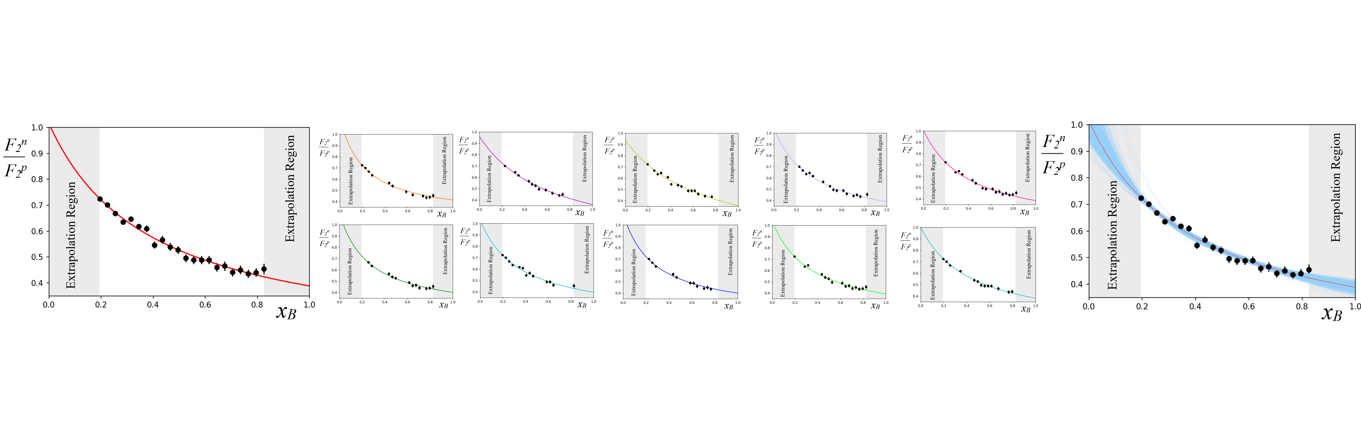